In [1]:
import meep as mp
from meep import mpb

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [2]:
import sys
sys.path.append("/home/ben/Desktop/Thesis/github/Thesis_name/Simulations/")
from ExternalFunctions import (calculate_ifield, plot_field_2D_YZ,  plot_field_2D_XZ,
                              plot_field_2D_XY, plot_intentsity_in_z_axis, geom_hexagon_PCS,
                              plot_unit_cell_cross_sections, plot_epsilon_XY)

In [3]:
save = True
plot = True
simulate = False

In [4]:
resolution = 32
num_bands = 6

In [5]:
a = 405 # nm
t = 180 / a
scaling = (1-t)*0.5

In [6]:
sx = 1 
sy = 1 
sz = 10
cell = mp.Vector3(sx, sy, sz)

In [7]:
parameters = [a, t, scaling]
geometry, geometry_lattice = geom_hexagon_PCS (parameters, cell)

-----------
Initializing structure...
time for choose_chunkdivision = 8.82149e-06 s
Working in 3D dimensions.
Computational cell is 1 x 1 x 10 with resolution 32
     block, center = (0,0,0)
          size (1e+20,1e+20,0.444444)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3.97404,3.97404,3.97404)
     prism, center = (0,0,0)
          height 0.444444, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (0.185185,0.185185,-0.222222)
          (0.37037,-0.185185,-0.222222)
          (0.185185,-0.37037,-0.222222)
          (-0.185185,-0.185185,-0.222222)
          (-0.37037,0.185185,-0.222222)
          (-0.185185,0.37037,-0.222222)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 1.91968 s
-----------


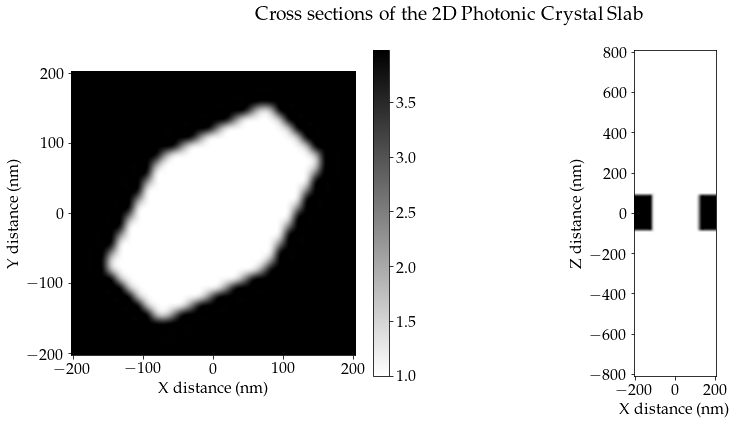

In [8]:
sim_params = resolution, cell, geometry
if plot == True:
    fig,  ax = plot_unit_cell_cross_sections(a, sim_params)

Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 32 x 32 x 320.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 10)
Cell volume = 8.66025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 0.1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0.444444)
          axes (1,0,0), (0,1,0), (0,0,1)
     prism, center = (0,0,0)
          height 0.444444, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (0.185185,0.185185,-0.222222)
          (0.37037,-0.185185,-0.222222)
          (0.185185,-0.37037,-0.222222)
          (-0.185185,-0.185185,-0.222222)
          (-0.37037,0.185185,-0.222222)
          (-0.185185,0.37037,-0.222222)
Geometric object tree has depth 1 and 10 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fiel

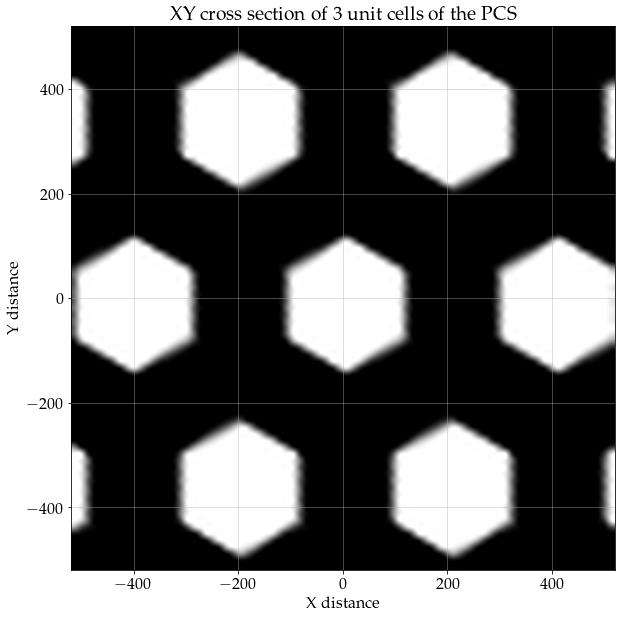

In [9]:
num_bands = 2
k_point = mp.Vector3(0.0,0.0,0.0)

sim_params = [geometry_lattice,  k_point, geometry, resolution, num_bands]

num_period = 3

xlim = [-520,520]
ylim = [-520,520]

title = 'XY cross section of 3 unit cells of the PCS'

if plot == True:
    fig, ax = plot_epsilon_XY (sim_params, a, num_period, xlim,  ylim, title, custom_material=False)

In [10]:
num_period = 3
k_point = mp.Vector3(2/3,1/3,0.0) #K point

sim_params = geometry_lattice,  k_point, geometry, resolution, num_bands

field, converted_eps = calculate_ifield(sim_params, num_period)

Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 32 x 32 x 320.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 10)
Cell volume = 8.66025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 0.1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0.444444)
          axes (1,0,0), (0,1,0), (0,0,1)
     prism, center = (0,0,0)
          height 0.444444, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (0.185185,0.185185,-0.222222)
          (0.37037,-0.185185,-0.222222)
          (0.185185,-0.37037,-0.222222)
          (-0.185185,-0.185185,-0.222222)
          (-0.37037,0.185185,-0.222222)
          (-0.185185,0.37037,-0.222222)
Geometric object tree has depth 1 and 10 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fiel

In [11]:
num_band = 1

(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:title={'center':'YZ projection of I field'}, xlabel='Z distance (nm)', ylabel='Y distance (nm)'>)

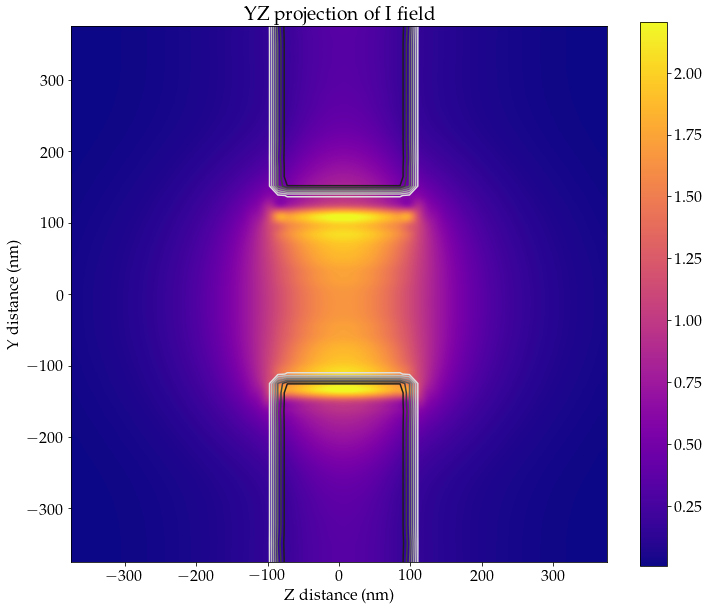

In [12]:
eps = converted_eps.T
a = 405  # nanometers


ylim = [-375,375]
zlim = [-375,375]
title = 'YZ projection of I field'

plot_field_2D_YZ(eps, np.array(field), a, resolution, num_band, ylim, zlim, title)

19 77 12 70


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:title={'center':'XY projection of I field'}, xlabel='X distance (nm)', ylabel='Y distance (nm)'>)

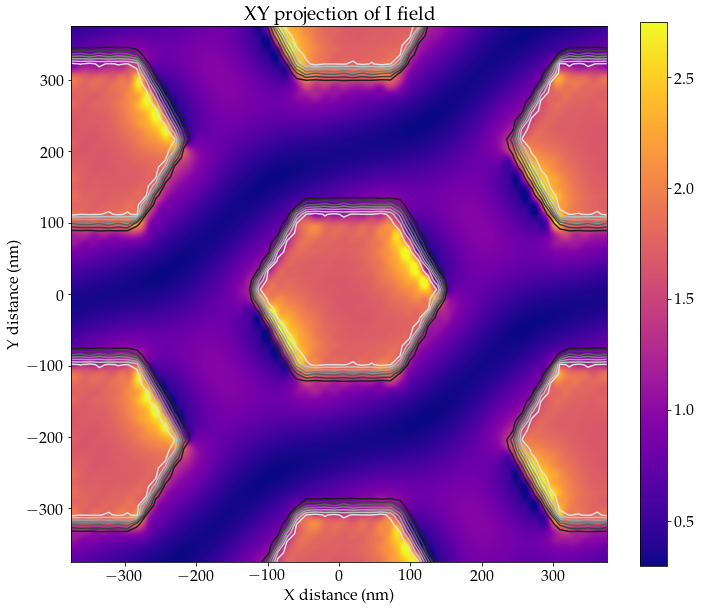

In [13]:
eps = converted_eps.T
a = 405  # nanometers


xlim = [-375,375]
ylim = [-375,375]
title = 'XY projection of I field'

plot_field_2D_XY(eps, np.array(field), a, resolution, num_band, xlim, ylim, title)

(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:title={'center':'XZ projection of I field'}, xlabel='Z distance (nm)', ylabel='X distance (nm)'>)

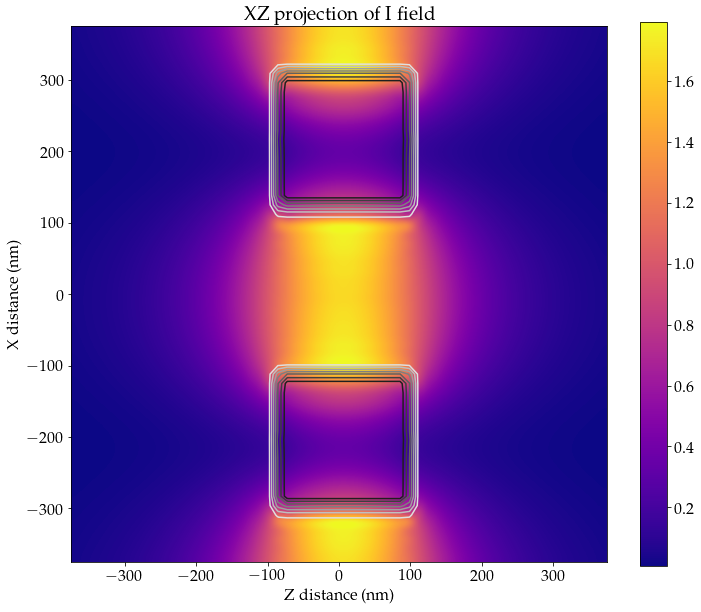

In [14]:
eps = converted_eps.T
a = 405  # nanometers


xlim = [-375,375]
zlim = [-375,375]
title = 'XZ projection of I field'

plot_field_2D_XZ(eps, np.array(field), a, resolution, num_band, xlim, zlim, title)